## 1. Import the libraries:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

import re
from collections import Counter

%matplotlib inline

## 2. Load the dataset:

In [64]:
data = pd.read_csv("Queries.csv")
data.head(2)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02


## 3. Exploratory Data Analysis:

The datatypes of the features:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


Check for any Null-Values:

In [4]:
data.isna().sum()

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

There is no any null data.

The **CTR** seems to have object data type, to perform any operations in the future, let's convert it to float type:

In [65]:
data['CTR'] = data['CTR'].str.rstrip("%").astype('float')/100
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   float64
 4   Position     1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
data.head(5)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


## 4. Count the most frequent words from the query:

In [7]:
# A function to find words and split them and discard punctuations:
def split_into_tokens(query):
    words = re.findall(r'\b[a-z]+\b', query.lower())
    return words


# Creating a counter to count the word frequency:
word_frequency = Counter()
for query in data['Top queries']:
    word_frequency.update(split_into_tokens(query))

#### The top 20 most common words:

In [8]:
top_20_common_df = pd.DataFrame(word_frequency.most_common(20), columns=["Words", "Counts"])
top_20_common_df.head(20)

,Words,Counts
0,python,562
1,in,232
2,code,138
3,learning,133
4,machine,123
5,using,105
6,game,103
7,number,95
8,to,82
9,prediction,70


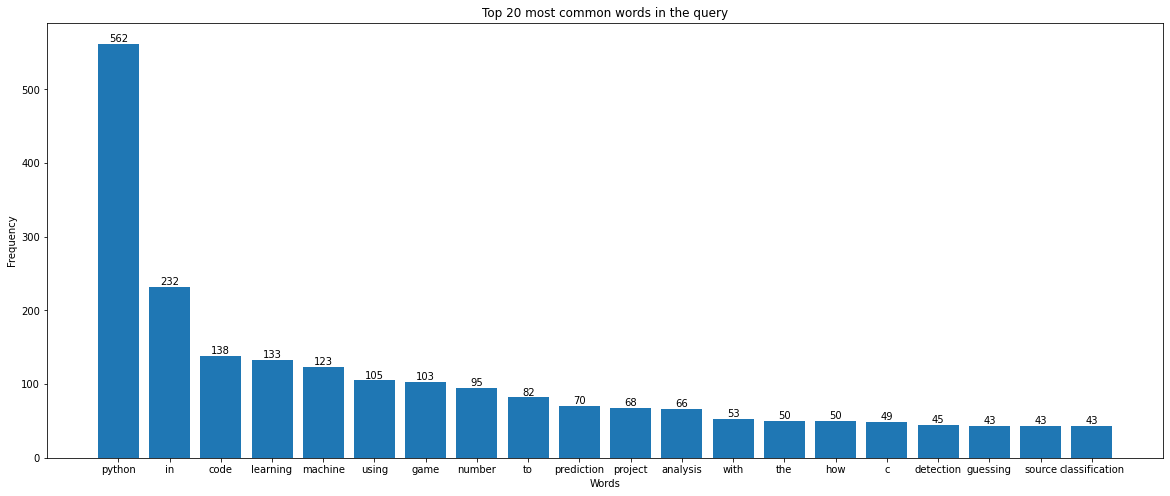

In [9]:
plt.figure(figsize=(20, 8))
bars = plt.bar(top_20_common_df.Words, top_20_common_df.Counts)
plt.bar_label(bars)
plt.title("Top 20 most common words in the query")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [18]:
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


## 5. Queries based on Clicks, Impressions, and CTR:

#### 5.1 Top 10 Queries  based on the number of Clicks:

In [22]:
top_10_queries_clicks = data.nlargest(n=10, columns='Clicks')[['Top queries', 'Clicks']]

In [23]:
top_10_queries_clicks

,Top queries,Clicks
0,number guessing game python,5223
1,thecleverprogrammer,2809
2,python projects with source code,2077
3,classification report in machine learning,2012
4,the clever programmer,1931
5,standard scaler in machine learning,1559
6,aman kharwal,1490
7,python turtle graphics code,1455
8,python game projects with source code,1421
9,82 python projects with source code,1343


#### 5.2 Top 10 Queries based on the number of Impressions:

In [24]:
top_10_queries_impression = data.nlargest(n=10, columns='Impressions')[['Top queries', 'Impressions']]

In [13]:
top_10_queries_impression

,Top queries,Impressions
2,python projects with source code,73380
82,r2 score,56322
34,machine learning roadmap,42715
21,classification report,39896
232,standardscaler,39267
91,facebook programming languages,36055
15,rock paper scissors python,35824
36,pandas datareader,26663
180,classification_report,24917
54,pandas_datareader,24689


#### Plotting the top 10 Queries based on clicks:

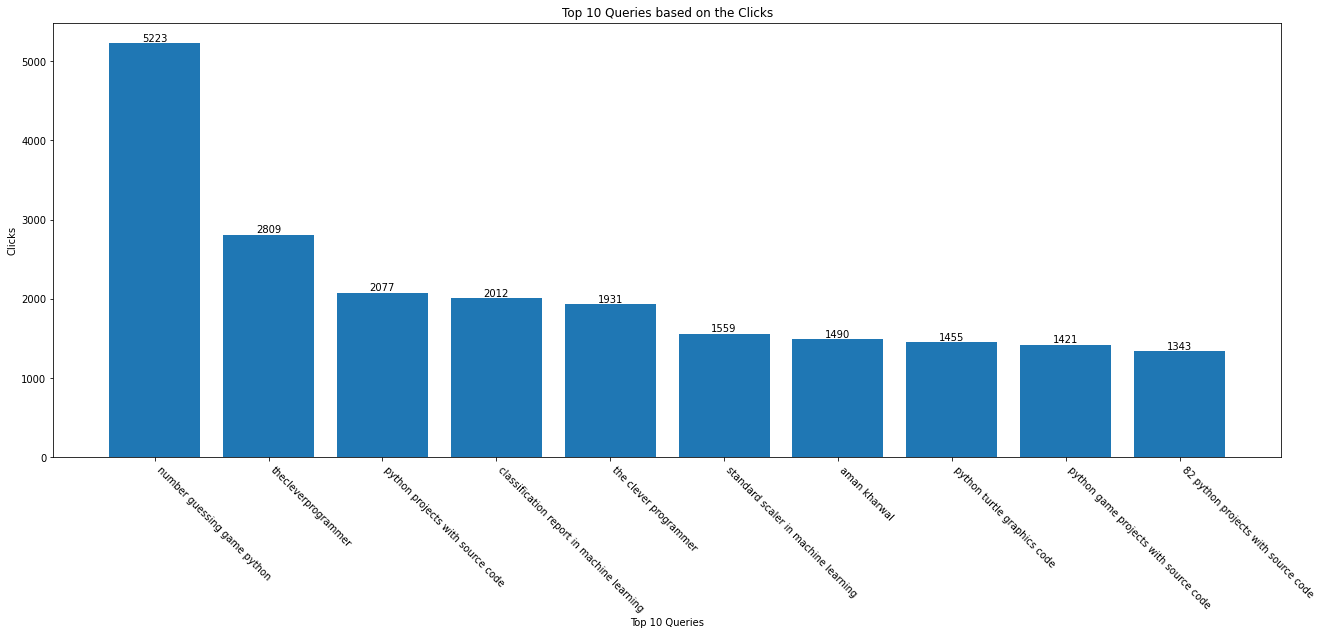

In [14]:
plt.figure(figsize=(22, 8))
bars = plt.bar(top_10_queries_clicks['Top queries'],  top_10_queries_clicks['Clicks'])
plt.bar_label(bars)
plt.xticks(rotation=-45, ha='left', fontsize=10)
plt.title("Top 10 Queries based on the Clicks")
plt.xlabel("Top 10 Queries")
plt.ylabel("Clicks")
plt.show()

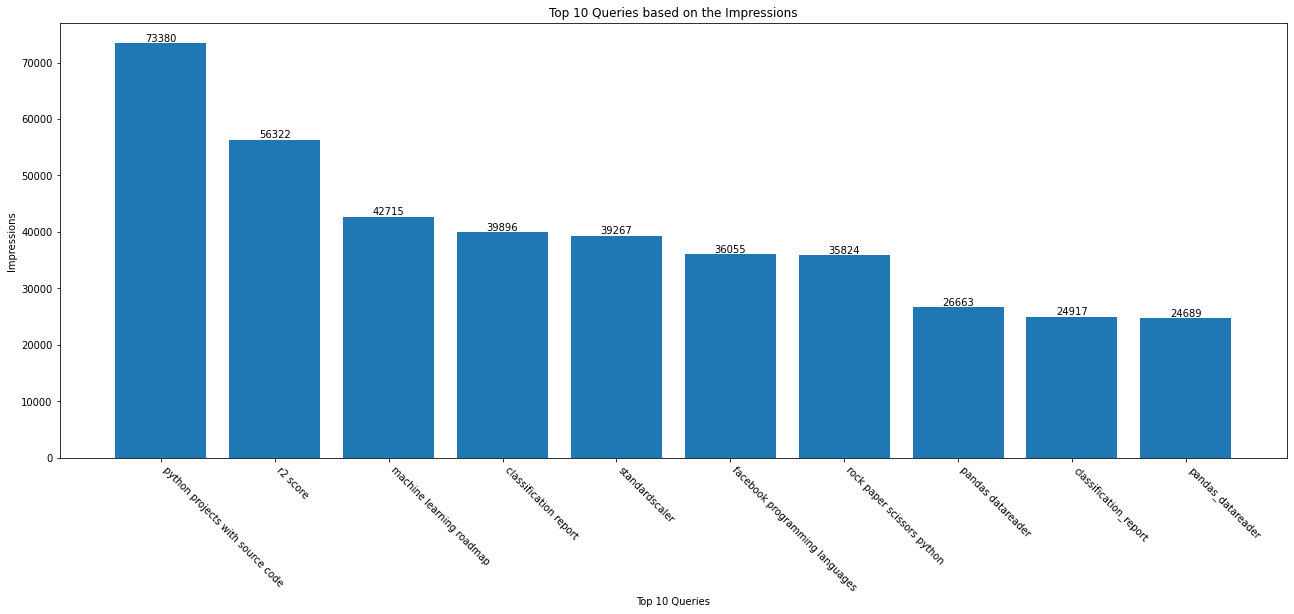

In [15]:
plt.figure(figsize=(22, 8))
bars = plt.bar(top_10_queries_impression['Top queries'], top_10_queries_impression['Impressions'])
plt.bar_label(bars)
plt.xticks(top_10_queries_impression['Top queries'], rotation=-45, ha='left')
plt.xlabel("Top 10 Queries")
plt.ylabel("Impressions")
plt.title("Top 10 Queries based on the Impressions")
plt.show()

In [17]:
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


#### 5.3 Queries based on the highest and lowest CTR (Click Through Rate):

**Top 10 queries of highest CTR:**

In [39]:
top_ctr_queries = data.nlargest(n=10, columns=['CTR'])[['Top queries', 'CTR']]
top_ctr_queries

,Top queries,CTR
928,the cleverprogrammer.com,0.8548
927,the clever programmer.com,0.8281
1,thecleverprogrammer,0.8128
732,the clever programmer python project,0.7857
307,the clever programmer machine learning projects,0.7735
4,the clever programmer,0.7638
964,python program to send otp to mobile,0.7083
95,the card game code in python,0.6699
771,write a python program that calculates number ...,0.6632
137,python program to calculate number of seconds ...,0.6585


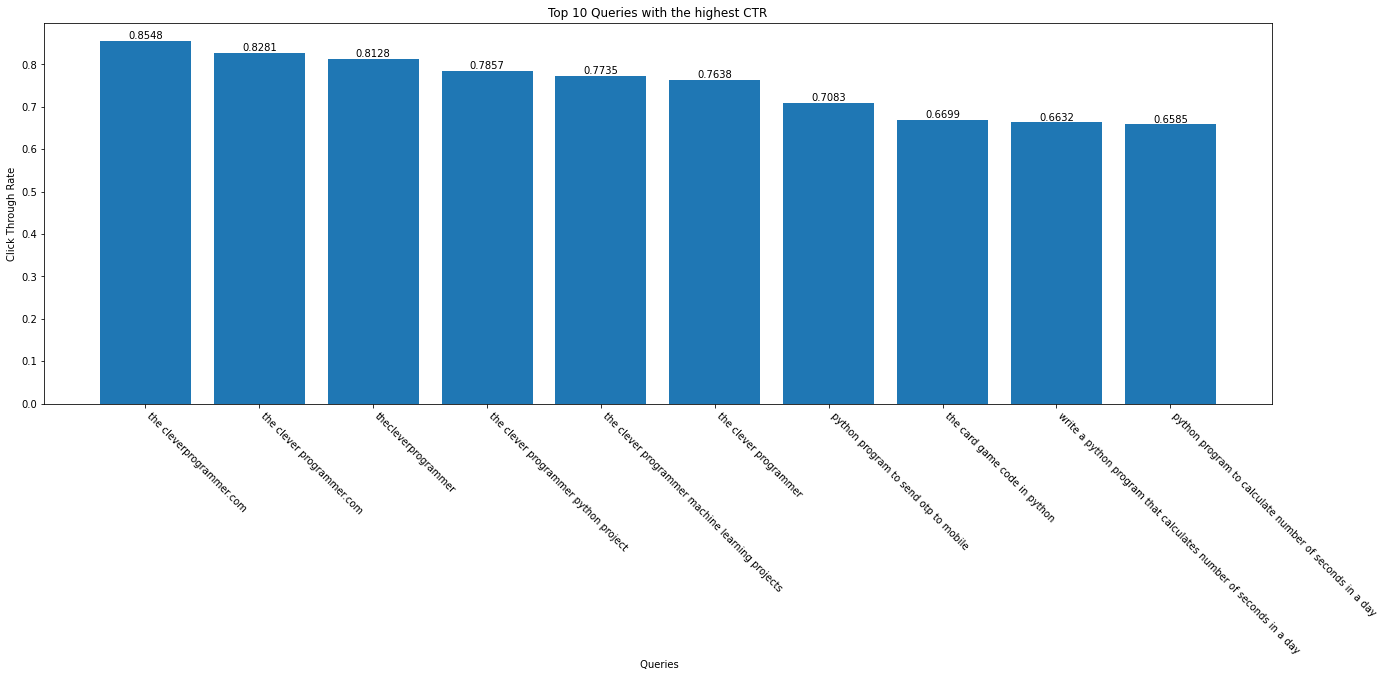

In [34]:
plt.figure(figsize=(22, 7))
bars = plt.bar(top_ctr_queries['Top queries'], top_ctr_queries['CTR'])
plt.bar_label(bars)
plt.xticks(top_ctr_queries['Top queries'], rotation='-45', ha='left')
plt.title("Top 10 Queries with the highest CTR")
plt.xlabel(" Queries")
plt.ylabel("Click Through Rate")
plt.show()

**Bottom 10 queries of highest CTR:**

In [37]:
bottom_ctr_queries = data.nsmallest(n=10, columns=['CTR'])[['Top queries', 'CTR']]

In [38]:
bottom_ctr_queries

,Top queries,CTR
929,python turtle,0.0029
232,standardscaler,0.0045
423,classification report sklearn,0.0047
544,standard scaler,0.0048
981,r2 score sklearn,0.0062
82,r2 score,0.0065
536,python source code,0.0067
664,online payment fraud detection,0.0070
684,turtle graphics,0.0070
858,water quality analysis,0.0076


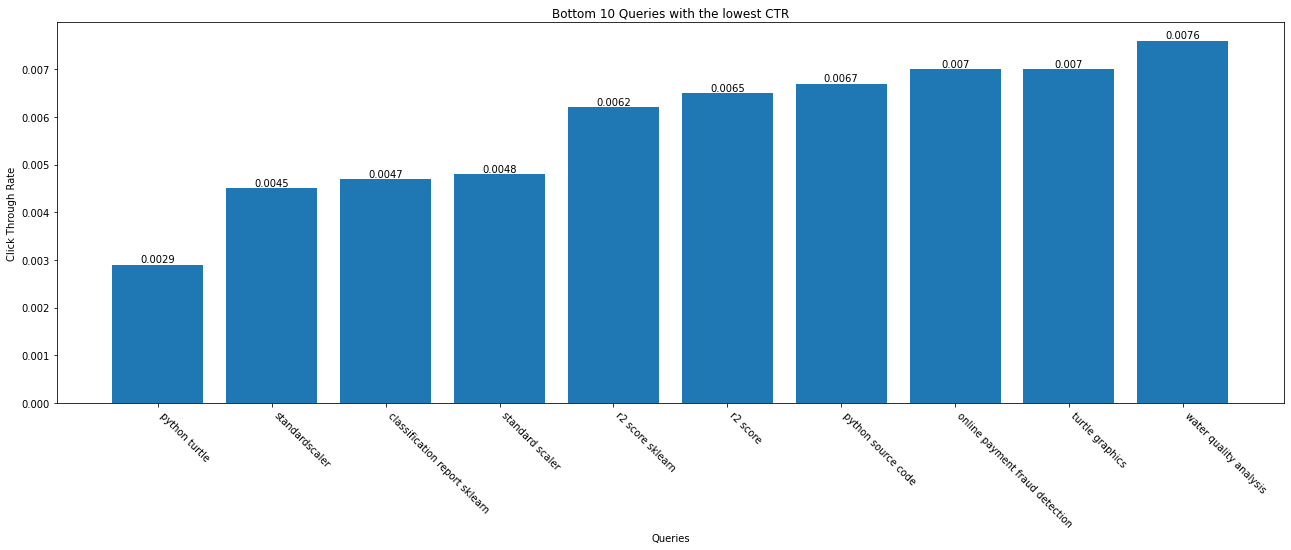

In [36]:
plt.figure(figsize=(22, 7))
bars = plt.bar(bottom_ctr_queries['Top queries'], bottom_ctr_queries['CTR'])
plt.bar_label(bars)
plt.xticks(bottom_ctr_queries['Top queries'], rotation='-45', ha='left')
plt.title("Bottom 10 Queries with the lowest CTR")
plt.xlabel("Queries")
plt.ylabel("Click Through Rate")
plt.show()

## 6. Understanding the correlation between the numerical features:

In [43]:
queries_corr = data.corr()
queries_corr

,Clicks,Impressions,CTR,Position
Clicks,1.000000,0.377256,0.106758,-0.111582
Impressions,0.377256,1.000000,-0.331126,0.357921
CTR,0.106758,-0.331126,1.000000,-0.728320
Position,-0.111582,0.357921,-0.728320,1.000000


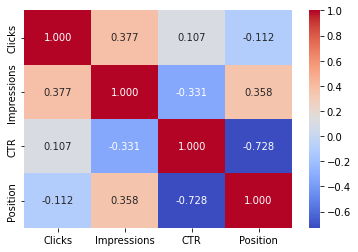

In [48]:
sns.heatmap(queries_corr, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

**1. Clicks and Impressions (0.377):** There is a moderate positive correlation between them. This means that as the number of impression increases, the number of clicks also tends to increase but not that strongly.

**2. Clicks and CTR (0.107):** They have a very weak positive correlation. This means an increase in clicks is slightly associated with the higher click through rate but the relationship is not so strong.

**3. Clicks and Positions (-0.112):** There is a sligh weak correlation between them, this means if the position of the link is at better position (lower i.e. 1 represents the first, 2 represents the second, and so on), there is a slight chance it might get clicked.

**4. Impressions and CTR (-0.331):** They have a moderate negative correlation. This means that if the link appears too often may be due to the advertisement the click-through-rate tends to decrease. This could be because the sites were more often in the search results but in less prominent positions or when the context of the search query doesn't match with the links that were shown.

**5. Impressions and Position (0.358):** There is a moderate positive correlation between them. This means as the impression of the site increases it tends to increase their average position (where Lower number = Higher ranks) slightly.

**6. CTR and Position (-0.728):** There is a strong negative correlation and it also makes sense because a better position (lower number where 1 represents the top rank, 2 the second and so on) will get higher click-through-rate. Which means higher positioned sites will get more clicks.

## 7. Detecting Anomalies in Search Queries:

For this task, we will be using **Isolation Forest** which is primarily used for anomaly detection. 

In [52]:
data.head(2)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02


In [66]:
features = data.iloc[:, 1:].values
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01) # Contamination is expected proportion of outliers
isolation_forest.fit(features)

IsolationForest(contamination=0.01)

In [71]:
data['is_anomaly'] = isolation_forest.predict(features)
data['is_anomaly'].value_counts()

 1    990
-1     10
Name: is_anomaly, dtype: int64

In [72]:
data['is_anomaly'] = data['is_anomaly'].replace({1:False, -1:True})

-1 represents the outliers, where in total we have 10 outliers.

In [73]:
data['is_anomaly'].value_counts()

False    990
True      10
Name: is_anomaly, dtype: int64

In [74]:
anamolies = data[data['is_anomaly'] == True]
anamolies

,Top queries,Clicks,Impressions,CTR,Position,is_anomaly
0,number guessing game python,5223,14578,0.3583,1.61,True
1,thecleverprogrammer,2809,3456,0.8128,1.02,True
2,python projects with source code,2077,73380,0.0283,5.94,True
3,classification report in machine learning,2012,4959,0.4057,1.28,True
4,the clever programmer,1931,2528,0.7638,1.09,True
15,rock paper scissors python,1111,35824,0.0310,7.19,True
21,classification report,933,39896,0.0234,7.53,True
34,machine learning roadmap,708,42715,0.0166,8.97,True
82,r2 score,367,56322,0.0065,9.33,True
167,text to handwriting,222,11283,0.0197,28.52,True


The anomalies in our search query data are more than just outliers; they highlight potential opportunities for growth, optimization, and strategic attention. These anomalies reveal emerging trends or areas of increasing interest. Being responsive to these trends is crucial for sustaining and enhancing the website's relevance and user engagement.

## 8. Summary:

Search Queries Anomaly Detection involves identifying queries that stand out as outliers based on their performance metrics. This process is valuable for businesses as it helps to uncover potential issues or opportunities, such as unusually high or low CTRs.